In [1]:
import pandas as pd
import numpy as np


In [12]:
housing=pd.read_csv("D:\housing1.csv")


In [25]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

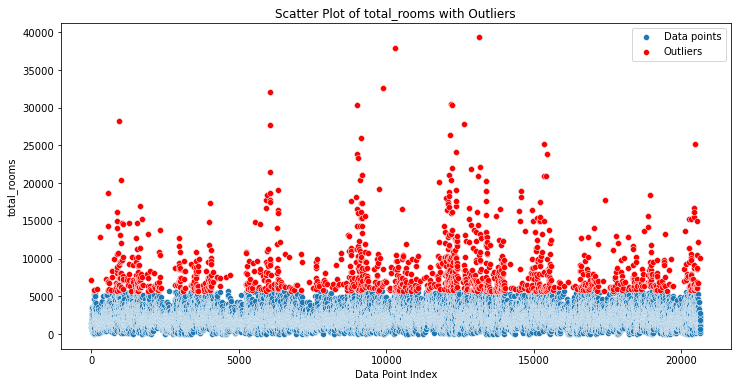

In [19]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df.index, y=df[feature_to_plot], label="Data points")
sns.scatterplot(x=outliers.index, y=outliers[feature_to_plot], color='red', label="Outliers")
plt.title(f"Scatter Plot of {feature_to_plot} with Outliers")
plt.xlabel("Data Point Index")
plt.ylabel(feature_to_plot)
plt.legend()
plt.show()

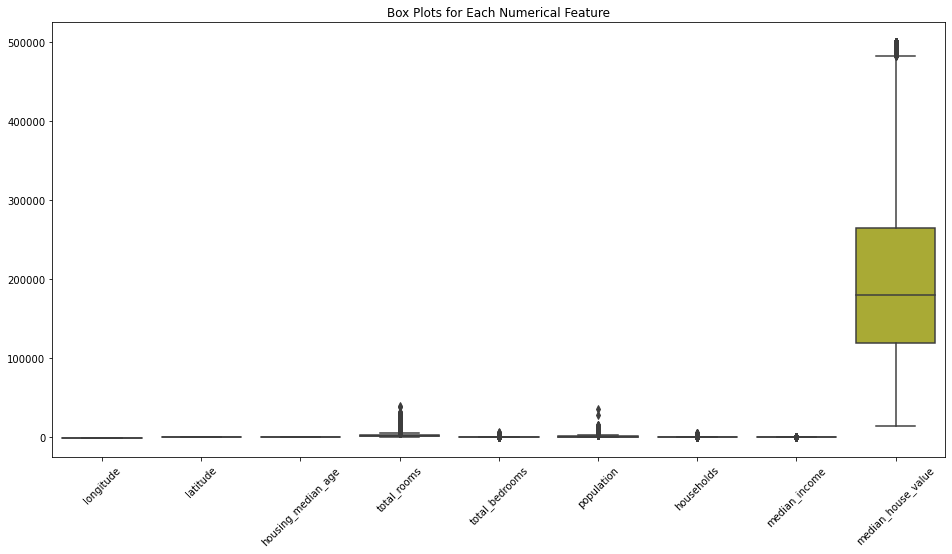

In [20]:
# Box plots for each numerical feature
plt.figure(figsize=(16, 8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title('Box Plots for Each Numerical Feature')
plt.show()

In [26]:
housing.dropna(inplace=True)

In [27]:
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

<ipython-input-40-80532d75aaf6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing['median_house_value'])


<Figure size 1152x576 with 0 Axes>

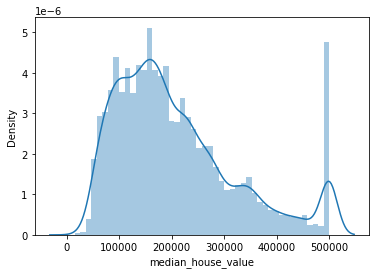

<Figure size 1152x576 with 0 Axes>

In [40]:
sns.distplot(housing['median_house_value'])
plt.figure(figsize=(16, 8))

-right side skewness
-Outliers may appear as individual bars far from the main concentration.


In [32]:
housing['median_house_value'].quantile(0)

14999.0

In [34]:
housing['median_house_value'].max()

500001.0

In [35]:
#find the q1 and q2 and q3 
housing['median_house_value'].quantile(0.25)

119500.0

In [36]:
housing['median_house_value'].quantile(0.5)

179700.0

In [37]:
housing['median_house_value'].quantile(0.25)

264700.0

In [38]:
#to find the iqr
median_income_iqr = housing['median_income'].quantile(0.75) - housing['median_income'].quantile(0.25)

print(f"IQR for 'median_income': {median_income_iqr}")

IQR for 'median_income': 2.1803


In [53]:
# Define the bin edges for grouping housing_median_age
bin_edges = [0, 20, 40, float('inf')]
bin_labels = ['0-20', '21-40', '41+']

In [54]:
# Create a new column 'age_group' based on the bin edges
housing['age_group'] = pd.cut(housing['housing_median_age'], bins=bin_edges, labels=bin_labels, right=False)

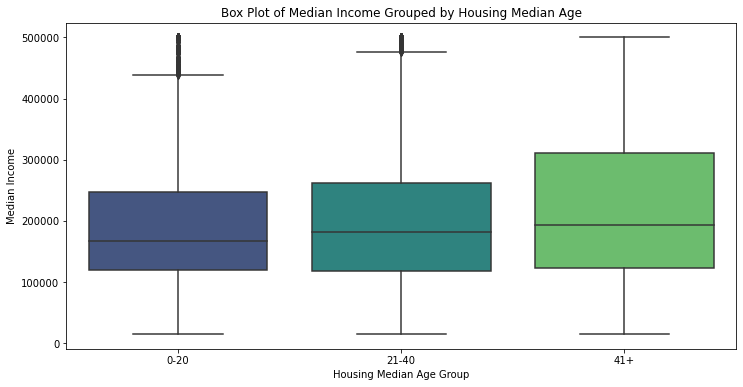

In [56]:
# Box plot for 'median_income' grouped by 'age_group'
plt.figure(figsize=(12, 6))
sns.boxplot(x='age_group', y='median_house_value', data=housing, palette='viridis')
plt.title('Box Plot of Median Income Grouped by Housing Median Age')
plt.xlabel('Housing Median Age Group')
plt.ylabel('Median Income')
plt.show()

- from the plot its clear that the new houses that age under old house or antic houses have more median income than the new that ranges between min 100000 to max is 2.5x 
-people are are willing to to bye the antic houses 


In [59]:
ex

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest
...,...,...,...,...,...,...
85,85,29,no fat,135,15 min,running
86,86,29,no fat,130,30 min,running
87,87,30,no fat,99,1 min,running
88,88,30,no fat,111,15 min,running


In [63]:
ex.dropna(inplace=True)

In [64]:
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
age_group             0
dtype: int64

<ipython-input-80-567578b7fcd0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ex['pulse'])


<AxesSubplot:xlabel='pulse', ylabel='Density'>

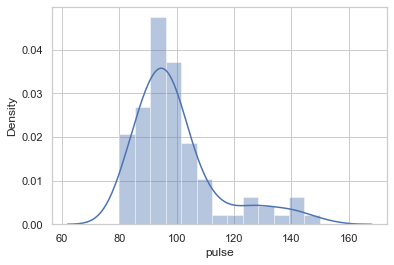

In [80]:
sns.distplot(ex['pulse'])

In [68]:
# Define the columns for which you want to find quantiles
quantile_columns = ['pulse']

In [81]:
# Group by 'kind' and 'time', then calculate quantiles
quantiles_df = ex.groupby(['kind', 'time'])[quantile_columns].quantile([0.25, 0.5, 0.75]).unstack()


In [82]:
# Display the quantiles DataFrame
print(quantiles_df)

                 pulse               
                  0.25   0.50    0.75
kind    time                         
rest    1 min    85.50   90.5   95.75
        15 min   85.75   92.0   96.25
        30 min   88.50   92.0   94.75
running 1 min    94.00   96.5   98.75
        15 min  106.25  117.5  126.00
        30 min  113.00  125.0  140.00
walking 1 min    89.25   92.5   96.50
        15 min   93.00   96.0  101.75
        30 min   90.75   97.5  100.75


In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

In [84]:
# Reset index for plotting
quantiles_df = quantiles_df.reset_index()

In [85]:
quantiles_df

kind    time   pulse               
                      0.25    0.5    0.75
0     rest   1 min   85.50   90.5   95.75
1     rest  15 min   85.75   92.0   96.25
2     rest  30 min   88.50   92.0   94.75
3  running   1 min   94.00   96.5   98.75
4  running  15 min  106.25  117.5  126.00
5  running  30 min  113.00  125.0  140.00
6  walking   1 min   89.25   92.5   96.50
7  walking  15 min   93.00   96.0  101.75
8  walking  30 min   90.75   97.5  100.75

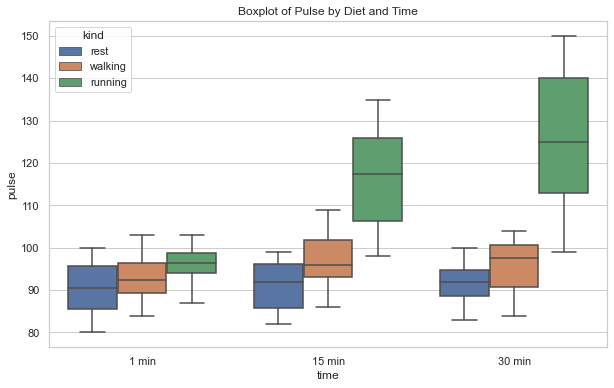

In [86]:
# Create a boxplot using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='time', y='pulse', hue='kind', data=ex, showfliers=False)  # Set showfliers to True if you want to include outliers
plt.title('Boxplot of Pulse by Diet and Time')
plt.show()

-as per time variation in the pluse rate if a person is walking ,rest, running